In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, re
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn import metrics, preprocessing
from sklearn.utils import shuffle
from tensorflow.keras import utils as np_utils

In [2]:
train_df = pd.read_csv('training_dataset_cubic_big.csv', sep='\t')

In [3]:
peaks = train_df[["peak_1", "peak_2", "peak_3", "peak_4","peak_5", "peak_6", "peak_7", "peak_8", "peak_9", "peak_10"]]
code = train_df['space_code']

In [4]:
training_data = pd.concat([peaks, code], axis=1)

In [5]:
training_data = shuffle(training_data)

In [6]:
X = training_data.drop(["space_code"], axis=1)
y = training_data["space_code"]

In [7]:
train_data, test_data, train_labels, test_labels = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [8]:
one_hot_train_labels = np_utils.to_categorical(train_labels)
one_hot_test_labels = np_utils.to_categorical(test_labels)
    
X_val = train_data[:10000]
partial_X_train = train_data[10000:]
y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

In [9]:
model = models.Sequential()
model.add(layers.Dense(500, kernel_regularizer=regularizers.l2(0.0001), activation='relu', input_dim=10))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
history = model.fit(partial_X_train, partial_y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

Train on 41641 samples, validate on 10000 samples
Epoch 1/10
41641/41641 [==============================] - 8s 184us/sample - loss: 0.6194 - accuracy: 0.8015 - val_loss: 0.1488 - val_accuracy: 0.9746
Epoch 2/10
41641/41641 [==============================] - 5s 129us/sample - loss: 0.1358 - accuracy: 0.9647 - val_loss: 0.0466 - val_accuracy: 1.0000
Epoch 3/10
41641/41641 [==============================] - 5s 127us/sample - loss: 0.0677 - accuracy: 0.9900 - val_loss: 0.0347 - val_accuracy: 1.0000
Epoch 4/10
41641/41641 [==============================] - 5s 129us/sample - loss: 0.0508 - accuracy: 0.9940 - val_loss: 0.0371 - val_accuracy: 0.9930
Epoch 5/10
41641/41641 [==============================] - 5s 127us/sample - loss: 0.0431 - accuracy: 0.9954 - val_loss: 0.0234 - val_accuracy: 1.0000
Epoch 6/10
41641/41641 [==============================] - 5s 130us/sample - loss: 0.0369 - accuracy: 0.9965 - val_loss: 0.0228 - val_accuracy: 1.0000
Epoch 7/10
41641/41641 [==========================

In [11]:
model.evaluate(test_data, one_hot_test_labels)

25436/25436 [==============================] - 4s 153us/sample - loss: 0.0157 - accuracy: 1.0000


[0.015717043526726083, 1.0]

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               5500      
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               64128     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 774       
Total params: 70,402
Trainable params: 70,402
Non-trainable params: 0
_________________________________________________________________


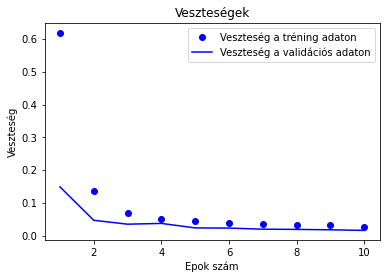

In [35]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Veszteség a tréning adaton')
plt.plot(epochs, val_loss, 'b', label='Veszteség a validációs adaton')
plt.title('Veszteségek')
plt.xlabel('Epok szám')
plt.ylabel('Veszteség')
plt.legend()
plt.savefig("loss_cubic_symmetry")
plt.show()

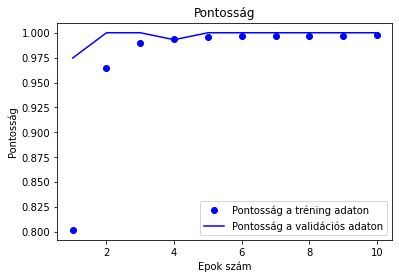

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'bo', label='Pontosság a tréning adaton')
plt.plot(epochs, val_acc, 'b', label='Pontosság a validációs adaton')
plt.title('Pontosság')
plt.xlabel('Epok szám')
plt.ylabel('Pontosság')
plt.legend()
plt.savefig("acc_cubic_symmetry")
plt.show()

In [14]:
test_df = pd.read_csv('test_dataset_cubic.csv', sep='\t')

In [15]:
peaks_test = test_df[["peak_1", "peak_2", "peak_3", "peak_4","peak_5", "peak_6", "peak_7", "peak_8", "peak_9", "peak_10"]]
codes_test = test_df['space_code']

In [16]:
testing_data = pd.concat([peaks_test, codes_test], axis=1)

In [17]:
X_test = testing_data.drop(["space_code"], axis=1)

In [18]:
y_test = testing_data["space_code"]

In [19]:
y_test_re = np_utils.to_categorical(y_test)

In [20]:
model.evaluate(X_test, y_test_re)

40/40 [==============================] - 0s 256us/sample - loss: 0.0247 - accuracy: 1.0000


[0.02474174741655588, 1.0]

In [32]:
model.save("cubic_symmetry_model.h5")